In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

sys.path.append('../infra/')
import AssetsData
from Evaluation import Evaluation

In [2]:
df = pd.read_csv("../data/init_data/train.csv").set_index(['TIMESTAMP', 'ID']).sort_index(0)

In [3]:
get = AssetsData.GetData()

In [4]:
# Get train and test df
train, test = get.get_80_20(df)
train = train.fillna(0)
test  = test.fillna(0)

In [5]:
def amount_of_days_with_asset(asset_obj, df):
    # Asset is filtered if this thing returns True
    return (df[df.index.get_level_values(1) == asset_obj.name].shape[0] < 300)

def classic_pred_filter(asset_obj, yi_pred):
    return ((yi_pred < asset_obj.factor_stat['y']['mean'] - 4*asset_obj.factor_stat['y']['std']) or
            (yi_pred > asset_obj.factor_stat['y']['mean'] + 4*asset_obj.factor_stat['y']['std']))

asset_pred_df = []

for asset in get.get_assets_names(df):
    print("Current working with {}".format(asset))
    # Regressor to test
    rng = np.random.RandomState(1)
    regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20), n_estimators=300, random_state=rng)
    # Asset data
    obj = AssetsData.Asset(asset)
    obj.select_factors(train)
    obj.config_factor_stat(train)
    obj.filter_asset(amount_of_days_with_asset, df)
    obj.train(train, regr, 'AdaboostTreeReg')
    asset_pred_df.append(obj.predict(test, 'AdaboostTreeReg', filter_pred = classic_pred_filter))

Current working with S0000
Current working with S0001
Current working with S0002
Current working with S0003
Current working with S0004
Current working with S0005
Current working with S0006
Current working with S0007
Current working with S0008
Current working with S0009
Current working with S0010
Current working with S0011
Current working with S0012
Current working with S0013
Current working with S0014
Current working with S0015
Current working with S0016
Current working with S0017
Current working with S0018
Current working with S0019
Current working with S0020
Current working with S0021
Current working with S0022
Current working with S0023
Current working with S0024
Current working with S0025
Current working with S0026
Current working with S0027
Current working with S0028
Current working with S0029
Current working with S0030
Current working with S0031
Current working with S0032
Current working with S0033
Current working with S0034
Current working with S0035
Current working with S0036
C

Current working with S0312
Current working with S0313
Current working with S0314
Current working with S0315
Current working with S0316
Current working with S0317
Current working with S0318
Current working with S0319
Current working with S0320
Current working with S0321
Current working with S0322
Current working with S0323
Current working with S0324
Current working with S0326
Current working with S0327
Current working with S0328
Current working with S0329
Current working with S0330
Current working with S0331
Current working with S0332
Current working with S0333
Current working with S0334
Current working with S0335
Current working with S0336
Current working with S0337
Current working with S0338
Current working with S0339
Current working with S0340
Current working with S0341
Current working with S0342
Current working with S0343
Current working with S0344
Current working with S0345
Current working with S0346
Current working with S0347
Current working with S0348
Current working with S0349
C

Current working with S0625
Current working with S0626
Current working with S0627
Current working with S0628
Current working with S0630
Current working with S0631
Current working with S0632
Current working with S0633
Current working with S0634
Current working with S0635
Current working with S0636
Current working with S0637
Current working with S0638
Current working with S0639
Current working with S0640
Current working with S0641
Current working with S0642
Current working with S0643
Current working with S0644
Current working with S0645
Current working with S0646
Current working with S0647
Current working with S0648
Current working with S0649
Current working with S0650
Current working with S0651
Current working with S0652
Current working with S0653
Current working with S0654
Current working with S0655
Current working with S0656
Current working with S0657
Current working with S0658
Current working with S0659
Current working with S0660
Current working with S0661
Current working with S0662
C

Current working with S0936
Current working with S0937
Current working with S0938
Current working with S0939
Current working with S0940
Current working with S0941
Current working with S0942
Current working with S0943
Current working with S0944
Current working with S0945
Current working with S0946
Current working with S0947
Current working with S0948
Current working with S0949
Current working with S0950
Current working with S0951
Current working with S0952
Current working with S0953
Current working with S0954
Current working with S0955
Current working with S0956
Current working with S0958
Current working with S0959
Current working with S0960
Current working with S0961
Current working with S0962
Current working with S0964
Current working with S0965
Current working with S0966
Current working with S0967
Current working with S0968
Current working with S0969
Current working with S0970
Current working with S0971
Current working with S0972
Current working with S0973
Current working with S0974
C

Current working with S1265
Current working with S1266
Current working with S1267
Current working with S1268
Current working with S1269
Current working with S1270
Current working with S1272
Current working with S1273
Current working with S1274
Current working with S1275
Current working with S1276
Current working with S1277
Current working with S1278
Current working with S1279
Current working with S1280
Current working with S1282
Current working with S1283
Current working with S1284
Current working with S1285
Current working with S1286
Current working with S1287
Current working with S1288
Current working with S1289
Current working with S1290
Current working with S1291
Current working with S1292
Current working with S1293
Current working with S1294
Current working with S1295
Current working with S1296
Current working with S1297
Current working with S1298
Current working with S1299
Current working with S1300
Current working with S1301
Current working with S1302
Current working with S1303
C

In [6]:
# Concatenate dataframes
ans = pd.concat(asset_pred_df)

SR = 0.0365283787733344, with mean 4.294402924154257e-05 and std 0.0011756346896208702


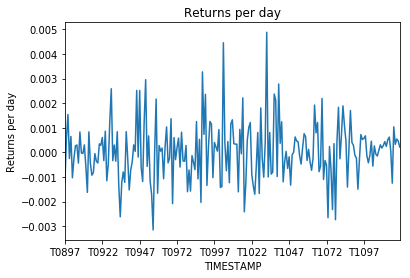

In [7]:
ev = Evaluation()
ev.evaluate(ans)